# punto1


In [76]:

import math
import itertools
import numpy as np
import pylab as pl

import time
import gc
import matplotlib.pyplot as plt
import scipy
from __future__ import unicode_literals
%matplotlib inline

In [77]:

def insertion_sort(A):
    time1=time.clock()
    j=1
    while j < len(A):
        pos = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > pos):
            A[i + 1] = A[i]
            i -= 1
        A[i + 1] = pos
        j += 1
    return time.clock()-time1

calculo de tiempo para el mejor caso 

In [78]:
def calc_timemejor( n):
    timesum = 0
    gc.collect()
    for i in range(1000):
        ordenada=range(1,n+1)
    
        timesum+=insertion_sort(ordenada)
        
    return (timesum/1000)

claculo de tiempo para el peor caso 

In [79]:
def calc_timepeor( n):
    
    timesum = 0
    gc.collect()
   
    for i in range(1000):
        desordenada=range(n,0,-1)
        
        timesum+=insertion_sort(desordenada)
        
    return (timesum/1000)

calculo de tiempo para el caso promedio para todas las permutaciones

In [80]:
def calc_timemedio(n):
 
    medio=0
    tam=0
    timesum=0
    gc.collect()
    lista=range(1,n+1)
    for i in range(1000):
        for p in itertools.permutations(lista):
            medio+=insertion_sort(list(p))
            tam+=1
        timesum+=(medio/tam)
        
    return (timesum/1000)
            

mejores

In [81]:
mejores=[]
mejor4=calc_timemejor(4)
mejor5=calc_timemejor(5)
mejor6=calc_timemejor(6)
mejores.append(mejor4)
mejores.append(mejor5)
mejores.append(mejor6)
print mejores

[7.301178862348934e-06, 7.368915411007038e-06, 1.003978803805694e-05]


peores

In [82]:
peores=[]
peores.append(calc_timepeor(4))
peores.append(calc_timepeor(5))
peores.append(calc_timepeor(6))
print peores


[1.1976232271649678e-05, 1.2826018059911348e-05, 1.8035984938933326e-05]


promedios

In [83]:
promedios=[]
promedios.append( calc_timemedio(4))
promedios.append( calc_timemedio(5))
promedios.append( calc_timemedio(6))
print promedios

[1.0063666901985225e-05, 9.850377329238539e-06, 1.1942069379524427e-05]


Grafica de interpolacion

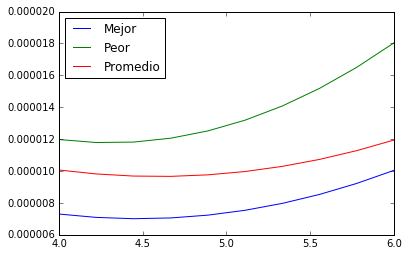

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import math

x = np.linspace(1,10**6,10**5,endpoint=True)
x2 = np.linspace(1,10**6,10**5,endpoint=True)

f1 = interp1d(x,mejores,kind='quadratic')
f2 = interp1d(x,peores,kind='quadratic')
f3 = interp1d(x,promedios,kind='quadratic')

#plt.plot(x,mejores,x,peores,x,promedios)
plt.plot(x2,f1(x2),x2,f2(x2),x2,f3(x2))
plt.legend(['Mejor','Peor','Promedio'],loc='best')

constantes para el polinomio 

In [85]:
from scipy.interpolate import interp1d
mejor = np.polyfit([4, 5, 6], mejores, 2)
med = np.polyfit([4, 5, 6], promedios, 2)
peor = np.polyfit([4, 5, 6], peores, 2)


print "Constantes para los polinomios:"
print "mejor: ("+str(mejor[0])+")x²+("+str(mejor[1])+")x+("+str(mejor[2])+")"
print "promedio: ("+str(med[0])+")x²+("+str(med[1])+")x+("+str(med[2])+")"
print "peor: ("+str(peor[0])+")x²+("+str(peor[1])+")x+("+str(peor[2])+")"

Constantes para los polinomios:
mejor: (1.3015680392e-06)x²+(-1.16463758041e-05)x+(3.30615934516e-05)
promedio: (1.15249081152e-06)x²+(-1.05857068764e-05)x+(3.39666414233e-05)
peor: (2.18009054538e-06)x²+(-1.87710291202e-05)x+(5.21789000262e-05)
